# Lana Culp - 11.20.2024 - Final Project
## Overview
I will be dissecting Overwatch 2 data based off of the hero statistics as of the year 2023. I will be trying to decipher which hero is the most worth learning to play based off of the win rate percentage. 

### References
I utilized statistics derrived from Kaggle (https://www.kaggle.com/datasets/mykhailokachan/overwatch-2-statistics?resource=download) which pulled data from the Heroes section on Overbuff (https://www.overbuff.com/heroes) which is an Overwatch data website that holds player statistics which allows players to look through the data and hopefully use that information to improve their own gameplay. The data was also listed on GitHub (https://github.com/mias1wot/Get-statistics-from-Overbuff). 

In [153]:
import urllib
import requests
import pandas as pd 
import json
import base64
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

# Data in Hand
### Overwatch 2 Hero Statistics 
Currently the hero statistics are organized by hero and skill tier. Each hero is listed with the statistics for each skill tier the hero was played in. The current skill tiers available listed from "easiest" to "hardest" are: bronze, silver, gold, platinum, diamond, master, and grandmaster. There is then an overall tier labeled "all" that describes the hero statistics across all of the skill tiers. With this data being collected from a third party source, it may not be exact information, but it is mostly accurate, and this is my interpretation of the data provided. 

In [154]:
ow_stats = pd.read_csv('ow2_quickplay_heroes_stats__2023-05-06.csv')
#ow_stats.head()

In [155]:
#ow_stats.keys()

### Tidy Data
I chose to drop a majority of columns due to them being extremely hero specific. I wanted to showcase the data that pertained to mostly all of the heros. 

In [156]:
#ow_stats_tidy.keys()

In [157]:
ow_stats_tidy = ow_stats.drop(columns = ['Jagged Blade Accuracy, %', 'Carnage Kills / 10min', 'Wound Uptime, %',
       'Rampage Kills / 10min', 'Focusing Beam Accuracy, %',
       'Focusing Beam Kills / 10min', 'Sticky Bomb Accuracy, %',
       'Sticky Bomb Kills / 10min', 'Duplicate Kills / 10min', 'Players Teleported / 10min', 'Sentry Turret Kills / 10min',
       'Hammer Kills / 10min', 'Turret Kills / 10min',
       'Molten Core Kills / 10min', 'Pummel Accuracy, %',
       'Pummel Kills / 10min', 'Ravenous Vortex Kills / 10min',
       'Annihilation Kills / 10min', 'EMP Kills / 10min', 'Grappling Claw Kills / 10min',
       'Piledriver Kills / 10min', 'Charged Shot Accuracy, %',
       'Charged Crit Accuracy, %', 'Charged Shot Kills / 10min',
       'Disruptor Shot Kills / 10min', 'Overclock Kills / 10min',
       'Average Damage Multiplier', 'Blizzard Kills / 10min', 'Jump Pack Kills / 10min',
       'Primal Rage Kills / 10min', 'Recon Kills / 10min',
       'Assault Kills / 10min', 'Tactical Grenade Kills / 10min',
       'Artillery Kills / 10min', 'Enemies Hacked / 10min',
       'Low Health Teleports / 10min', 'Overhealth / 10min', 'Gravitic Flux Kills / 10min',
       'Rocket Punch Kills / 10min', 'Seismic Slam Kills / 10min',
       'Meteor Strike Kills / 10min', 'Inspire Uptime',
       'Icicle Accuracy, % / 10min', 'Icicle Crit Accuracy, % / 10min',
       'Enemies Frozen / 10min', 'Healing Accuracy', 'Deaths Prevented / 10min',
       'Amp Matrix Assists / 10min', 'Energy Javelin Kills / 10min',
       'Javelin Spin Kills / 10min', 'Terra Surge Kills / 10min', 'Airtime, %',
       'Barrage Kills / 10min', 'Accretion Kills / 10min', 'Pulse Bomb Kills / 10min', 'Chain Hook Kills / 10min',
       'Chain Hook Accuracy, %', 'Whole Hog Kills / 10min',
       'Primary Accuracy, %', 'High Energy Kills / 10min', 'Average Energy, %',
       'Graviton Surge Kills / 10min', 'Death Blossom Kills / 10min', 'Direct Hits',
       'Concussion Mine Kills / 10min', 'Enemies Trapped / 10min',
       'Coach Gun Kills / 10min', 'Dynamite Kills / 10min',
       'Bob Kills / 10min', 'Self Healing / 10min',
       'Low Health Recalls / 10min', 'Pulse Bombs Stuck / 10min', 'Tactical Visor Kills / 10min',
       'Charged Volley Accuracy, %', 'Charged Volley Kills / 10min',
       'Transcendence Healing / 10min', 'Knockbacks / 10min',
       'Sound Barriers / 10min', 'Micro Missile Kills, % / 10min',
       'Call Mech Kills / 10min', 'Self-Destruct Kills / 10min', 'Fire Strike Kills / 10min', 'Earthshatter Kills / 10min',
       'Long Range Kills / 10min', 'Storm Arrow Kills / 10min',
       'Recon Assists / 10min', 'Dragonstrike Kills / 10min',
       'Venom Mine Kills / 10min', 'Helix Rocket Accuracy, %',
       'Helix Rocket Kills / 10min', 'Effects Cleansed / 10min',
       'Kitsune Rush Assists / 10min', 'Secondary Accuracy, %',
       'Biotic Orb Kills / 10min', 'Ally Coalescence Efficiency, %',
       'Enemy Coalescence Efficiency, %', 'Coalescence Kills / 10min',
       'Objective Contest Time / 10min', 'Charge Kills / 10min', 'Crit Accuracy, %', 'Deadeye Kills / 10min',
       'Magnetic Grenade Attaches', 'Magnetic Grenade Kills / 10min',
       'Swift Strike Resets / 10min', 'Damage Reflected / 10min',
       'Ultimates Reflected / 10min', 'Dragonblade Kills / 10min',
       'Kunai Kills / 10min', 'Biotic Grenade Kills / 10min',
       'Enemies Slept / 10min', 'Healing Amplified / 10min',
       'Nano Boost Assists / 10min', 'Blaster Kills / 10min',
       'Damage Amplified / 10min', 'Players Resurrected / 10min', 'Scoped Accuracy, %', 'Final Blows / 10min',
       'Solo Kills / 10min', 'Weapon Accuracy, %'])
ow_stats_tidy.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
0,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,6.28,Support
1,Ana,Bronze,4.29,6.05,47.17,9.12,3.75,53,2483,6819.0,6.51,Support
2,Ana,Silver,4.33,5.77,47.27,9.19,3.80,53,2505,6829.0,6.52,Support
3,Ana,Gold,4.45,6.01,47.54,9.37,3.86,54,2542,6958.0,6.47,Support
4,Ana,Platinum,4.70,7.06,47.94,9.60,3.91,53,2575,7168.0,6.36,Support


### Sorting Values
I decided to sort the data with the highest win percentage at the top just to see which hero is deemed the most likely to win when played in games, and from the data, it seems that the support hero Brigette has the highest win percentage when played at the Grandmaster skill tier level. 

In [158]:
ow_stats_tidy.sort_values('Win Rate, %', ascending = False).head(10)

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
199,Brigitte,Grandmaster,4.72,2.10,56.36,13.97,5.36,80,3831,7336.0,7.50,Support
198,Brigitte,Master,4.67,2.02,56.32,13.98,5.39,80,3829,7326.0,7.55,Support
197,Brigitte,Diamond,4.69,2.00,56.22,14.03,5.43,81,3841,7320.0,7.59,Support
250,Symmetra,Silver,3.66,1.57,56.18,18.92,8.33,56,7046,NaN,7.68,Damage
249,Symmetra,Bronze,3.59,1.60,56.13,18.72,8.25,56,6943,NaN,7.66,Damage
192,Brigitte,All,4.80,1.83,56.10,14.04,5.40,81,3873,7349.0,7.62,Support
196,Brigitte,Platinum,4.63,1.79,56.08,13.95,5.45,82,3817,7233.0,7.69,Support
195,Brigitte,Gold,4.46,1.64,56.01,13.69,5.42,83,3737,7076.0,7.82,Support
255,Symmetra,Grandmaster,3.63,1.76,55.99,19.08,8.05,53,7212,NaN,7.65,Damage
194,Brigitte,Silver,4.35,1.66,55.94,13.42,5.36,84,3653,6974.0,7.87,Support


### Dataframes 
I decided to organize the data into separate dataframes based on the skill tier. For the overall skill tier, I divided the dataframe by role, so I could see which hero is best for each role: tank, damage, and support. These roles will more accurately see which hero is best for that role since each role has different special abilities. 

In [159]:
all_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'All']
all_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
0,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,6.28,Support
8,Mercy,All,4.46,7.12,49.84,2.37,0.80,49,507,8727.0,6.30,Support
16,Cassidy,All,2.48,4.31,45.39,18.33,6.35,44,7679,NaN,8.45,Damage
24,Genji,All,2.76,5.44,49.04,18.46,5.50,56,7026,NaN,8.27,Damage
32,Kiriko,All,5.38,3.30,49.92,9.48,3.91,66,2760,7988.0,5.66,Support


In [160]:
tank_df = all_df[all_df['Role'] == 'Tank']
tank_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
48,Reinhardt,All,3.28,3.86,51.80,16.10,5.66,95,7106,NaN,7.82,Tank
96,D.Va,All,6.72,3.65,50.13,21.08,6.60,93,7065,NaN,5.53,Tank
128,Roadhog,All,4.03,2.65,46.58,18.48,7.11,83,7085,NaN,6.66,Tank
136,Zarya,All,5.21,2.42,49.00,20.07,8.53,93,7811,NaN,6.26,Tank
160,Orisa,All,3.94,1.66,47.12,17.93,8.27,98,7542,NaN,7.02,Tank


In [161]:
dps_df = all_df[all_df['Role'] == 'Damage']
dps_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
16,Cassidy,All,2.48,4.31,45.39,18.33,6.35,44,7679,NaN,8.45,Damage
24,Genji,All,2.76,5.44,49.04,18.46,5.50,56,7026,NaN,8.27,Damage
56,Hanzo,All,3.41,4.23,47.11,17.51,5.98,39,7555,NaN,7.75,Damage
64,Widowmaker,All,2.75,4.10,44.83,15.36,3.66,15,5564,NaN,7.55,Damage
72,Soldier: 76,All,3.27,3.20,48.05,20.51,7.74,50,8689,1424.0,8.22,Damage


In [162]:
supp_df = all_df[all_df['Role'] == 'Support']
supp_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
0,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,6.28,Support
8,Mercy,All,4.46,7.12,49.84,2.37,0.80,49,507,8727.0,6.30,Support
32,Kiriko,All,5.38,3.30,49.92,9.48,3.91,66,2760,7988.0,5.66,Support
40,Moira,All,6.67,3.73,51.04,19.53,8.62,75,5408,8206.0,6.43,Support
80,Zenyatta,All,5.79,3.33,52.54,14.80,5.86,55,5092,5708.0,7.08,Support


In [163]:
bronze_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'Bronze']
bronze_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
1,Ana,Bronze,4.29,6.05,47.17,9.12,3.75,53,2483,6819.0,6.51,Support
9,Mercy,Bronze,3.90,7.13,49.43,2.15,0.78,50,463,8454.0,6.60,Support
17,Cassidy,Bronze,2.25,3.68,45.16,16.99,6.10,46,7056,NaN,8.57,Damage
25,Genji,Bronze,2.44,4.21,48.02,16.66,5.25,58,6317,NaN,8.43,Damage
33,Kiriko,Bronze,4.87,2.10,48.21,8.32,3.65,66,2432,7597.0,5.95,Support


In [164]:
silver_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'Silver']
silver_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
2,Ana,Silver,4.33,5.77,47.27,9.19,3.80,53,2505,6829.0,6.52,Support
10,Mercy,Silver,3.97,6.54,49.61,2.20,0.79,51,472,8506.0,6.58,Support
18,Cassidy,Silver,2.27,3.56,45.20,17.06,6.16,47,7075,NaN,8.55,Damage
26,Genji,Silver,2.45,3.96,47.88,16.74,5.30,58,6357,NaN,8.43,Damage
34,Kiriko,Silver,4.93,2.09,48.69,8.48,3.73,67,2470,7668.0,5.92,Support


In [132]:
gold_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'Gold']
gold_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
3,Ana,Gold,4.45,6.01,47.54,9.37,3.86,54,2542,6958.0,6.47,Support
11,Mercy,Gold,4.09,6.47,49.47,2.24,0.80,50,479,8607.0,6.50,Support
19,Cassidy,Gold,2.33,3.66,45.16,17.43,6.25,46,7242,NaN,8.51,Damage
27,Genji,Gold,2.53,4.03,48.17,17.19,5.38,58,6534,NaN,8.37,Damage
35,Kiriko,Gold,5.04,2.26,48.97,8.72,3.79,68,2533,7810.0,5.83,Support


In [133]:
plat_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'Platinum']
plat_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
4,Ana,Platinum,4.70,7.06,47.94,9.60,3.91,53,2575,7168.0,6.36,Support
12,Mercy,Platinum,4.29,6.87,49.61,2.30,0.80,50,491,8741.0,6.37,Support
20,Cassidy,Platinum,2.41,4.20,45.28,18.00,6.32,45,7495,NaN,8.47,Damage
28,Genji,Platinum,2.64,4.93,48.33,17.93,5.47,57,6818,NaN,8.31,Damage
36,Kiriko,Platinum,5.23,2.63,49.56,9.02,3.84,67,2613,7975.0,5.70,Support


In [136]:
diamond_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'Diamond']
diamond_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
5,Ana,Diamond,4.87,7.91,48.29,9.78,3.91,52,2605,7306.0,6.28,Support
13,Mercy,Diamond,4.36,8.09,49.43,2.32,0.79,49,497,8755.0,6.31,Support
21,Cassidy,Diamond,2.47,4.79,45.48,18.45,6.33,43,7700,NaN,8.45,Damage
29,Genji,Diamond,2.76,5.87,48.64,18.58,5.52,56,7047,NaN,8.27,Damage
37,Kiriko,Diamond,5.36,2.69,49.47,9.26,3.85,65,2693,8032.0,5.63,Support


In [137]:
master_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'Master']
master_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
6,Ana,Master,4.84,8.41,48.03,9.83,3.88,51,2619,7314.0,6.26,Support
14,Mercy,Master,4.29,8.71,49.95,2.33,0.78,48,495,8730.0,6.31,Support
22,Cassidy,Master,2.48,4.92,45.57,18.55,6.28,43,7747,NaN,8.48,Damage
30,Genji,Master,2.77,6.17,49.10,18.80,5.50,55,7118,NaN,8.28,Damage
38,Kiriko,Master,5.32,2.58,49.46,9.31,3.81,64,2725,7976.0,5.65,Support


In [144]:
gm_df = ow_stats_tidy[ow_stats_tidy['Skill Tier'] == 'Grandmaster']
gm_df.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Role
7,Ana,Grandmaster,4.88,8.39,48.26,9.89,3.86,51,2649,7288.0,6.27,Support
15,Mercy,Grandmaster,4.24,9.90,50.67,2.34,0.79,48,499,8678.0,6.34,Support
23,Cassidy,Grandmaster,2.49,4.90,45.81,18.61,6.23,42,7783,NaN,8.50,Damage
31,Genji,Grandmaster,2.82,6.22,49.48,18.90,5.46,54,7133,NaN,8.28,Damage
39,Kiriko,Grandmaster,5.36,2.45,49.79,9.55,3.82,63,2817,7893.0,5.67,Support


# Analysis Plan
### Skill Tier Statistics
I developed histograms to showcase the statistics for each hero based off of which skill I want to obsereve. 

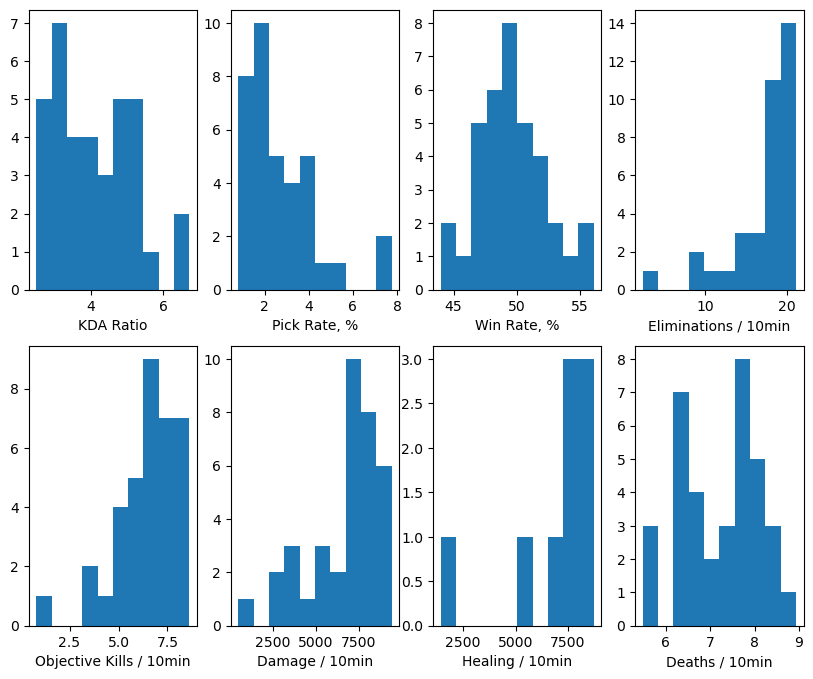

In [165]:
fig1, ax1 = plt.subplots(2, 4, figsize = (10, 8))
ax1[0, 0].hist(all_df['KDA Ratio'], bins=10)
ax1[0, 1].hist(all_df['Pick Rate, %'], bins=10)
ax1[0, 2].hist(all_df['Win Rate, %'], bins=10)
ax1[0, 3].hist(all_df['Eliminations / 10min'], bins=10)
ax1[1, 0].hist(all_df['Objective Kills / 10min'], bins=10)
ax1[1, 1].hist(all_df['Damage / 10min'], bins=10)
ax1[1, 2].hist(all_df['Healing / 10min'], bins=10)
ax1[1, 3].hist(all_df['Deaths / 10min'], bins=10)
ax1[0, 0].set_xlabel('KDA Ratio')
ax1[0, 1].set_xlabel('Pick Rate, %')
ax1[0, 2].set_xlabel('Win Rate, %')
ax1[0, 3].set_xlabel('Eliminations / 10min')
ax1[1, 0].set_xlabel('Objective Kills / 10min')
ax1[1, 1].set_xlabel('Damage / 10min')
ax1[1, 2].set_xlabel('Healing / 10min')
ax1[1, 3].set_xlabel('Deaths / 10min')

plt.show()

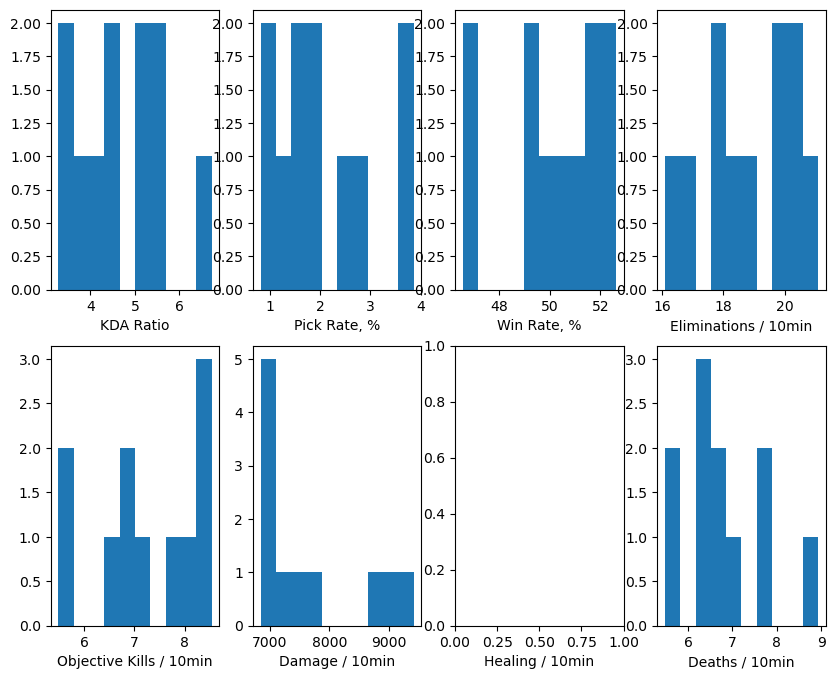

In [172]:
fig2, ax2 = plt.subplots(2, 4, figsize = (10, 8))
ax2[0, 0].hist(tank_df['KDA Ratio'], bins=10)
ax2[0, 1].hist(tank_df['Pick Rate, %'], bins=10)
ax2[0, 2].hist(tank_df['Win Rate, %'], bins=10)
ax2[0, 3].hist(tank_df['Eliminations / 10min'], bins=10)
ax2[1, 0].hist(tank_df['Objective Kills / 10min'], bins=10)
ax2[1, 1].hist(tank_df['Damage / 10min'], bins=10)
#ax2[1, 2].hist(tank_df['Healing / 10min'], bins=10)
ax2[1, 3].hist(tank_df['Deaths / 10min'], bins=10)
ax2[0, 0].set_xlabel('KDA Ratio')
ax2[0, 1].set_xlabel('Pick Rate, %')
ax2[0, 2].set_xlabel('Win Rate, %')
ax2[0, 3].set_xlabel('Eliminations / 10min')
ax2[1, 0].set_xlabel('Objective Kills / 10min')
ax2[1, 1].set_xlabel('Damage / 10min')
ax2[1, 2].set_xlabel('Healing / 10min')
ax2[1, 3].set_xlabel('Deaths / 10min')

plt.show()

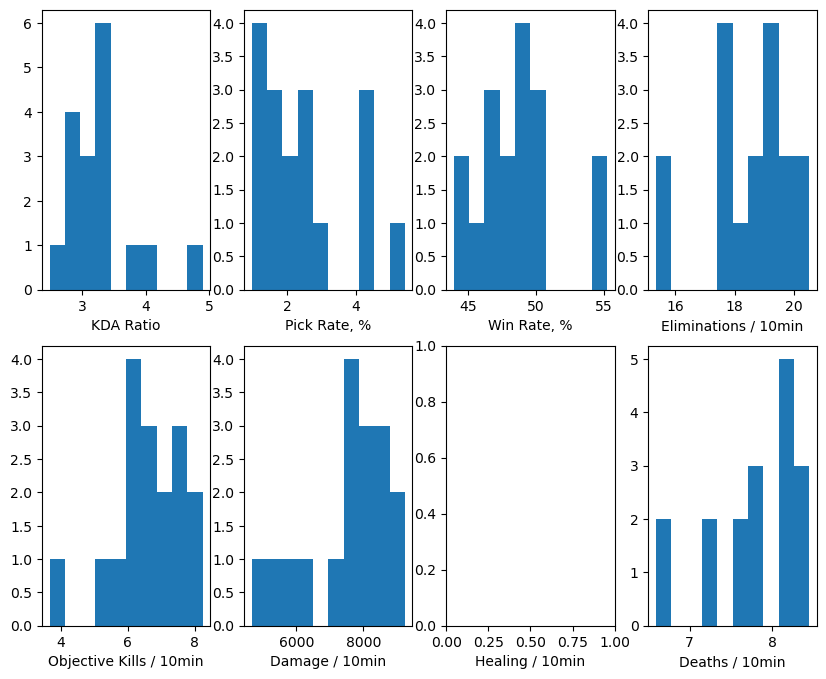

In [169]:
fig3, ax3 = plt.subplots(2, 4, figsize = (10, 8))
ax3[0, 0].hist(dps_df['KDA Ratio'], bins=10)
ax3[0, 1].hist(dps_df['Pick Rate, %'], bins=10)
ax3[0, 2].hist(dps_df['Win Rate, %'], bins=10)
ax3[0, 3].hist(dps_df['Eliminations / 10min'], bins=10)
ax3[1, 0].hist(dps_df['Objective Kills / 10min'], bins=10)
ax3[1, 1].hist(dps_df['Damage / 10min'], bins=10)
#ax3[1, 2].hist(dps_df['Healing / 10min'], bins=10)
ax3[1, 3].hist(dps_df['Deaths / 10min'], bins=10)
ax3[0, 0].set_xlabel('KDA Ratio')
ax3[0, 1].set_xlabel('Pick Rate, %')
ax3[0, 2].set_xlabel('Win Rate, %')
ax3[0, 3].set_xlabel('Eliminations / 10min')
ax3[1, 0].set_xlabel('Objective Kills / 10min')
ax3[1, 1].set_xlabel('Damage / 10min')
ax3[1, 2].set_xlabel('Healing / 10min')
ax3[1, 3].set_xlabel('Deaths / 10min')

plt.show()

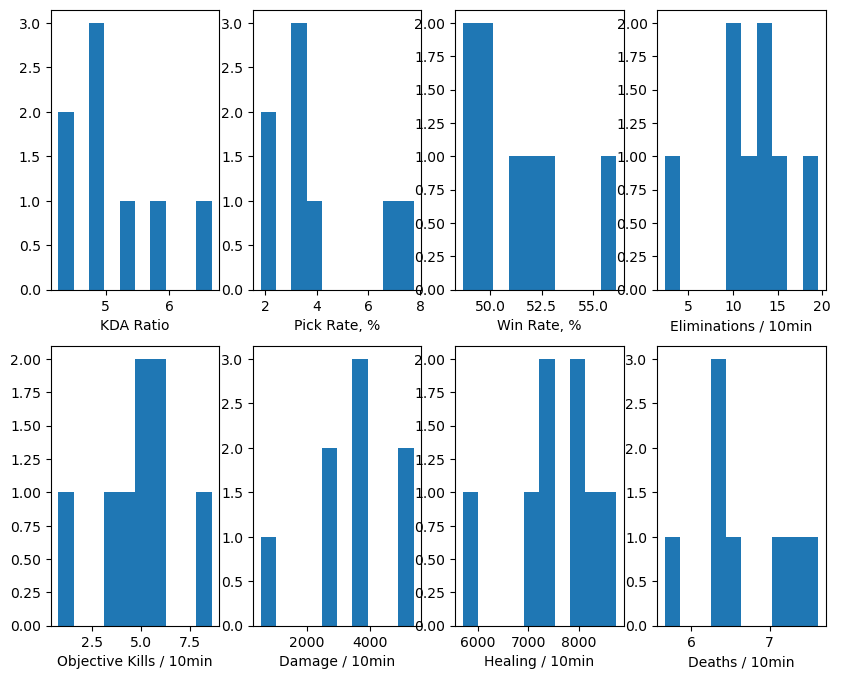

In [170]:
fig4, ax4 = plt.subplots(2, 4, figsize = (10, 8))
ax4[0, 0].hist(supp_df['KDA Ratio'], bins=10)
ax4[0, 1].hist(supp_df['Pick Rate, %'], bins=10)
ax4[0, 2].hist(supp_df['Win Rate, %'], bins=10)
ax4[0, 3].hist(supp_df['Eliminations / 10min'], bins=10)
ax4[1, 0].hist(supp_df['Objective Kills / 10min'], bins=10)
ax4[1, 1].hist(supp_df['Damage / 10min'], bins=10)
ax4[1, 2].hist(supp_df['Healing / 10min'], bins=10)
ax4[1, 3].hist(supp_df['Deaths / 10min'], bins=10)
ax4[0, 0].set_xlabel('KDA Ratio')
ax4[0, 1].set_xlabel('Pick Rate, %')
ax4[0, 2].set_xlabel('Win Rate, %')
ax4[0, 3].set_xlabel('Eliminations / 10min')
ax4[1, 0].set_xlabel('Objective Kills / 10min')
ax4[1, 1].set_xlabel('Damage / 10min')
ax4[1, 2].set_xlabel('Healing / 10min')
ax4[1, 3].set_xlabel('Deaths / 10min')

plt.show()

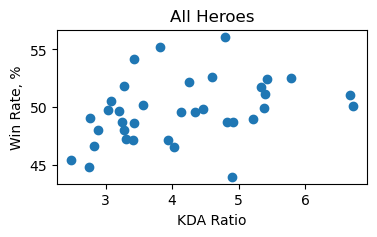

In [176]:
fig5, ax5 = plt.subplots(figsize = (4, 2))
ax5.scatter(all_df['KDA Ratio'], all_df['Win Rate, %'])
ax5.set_xlabel('KDA Ratio')
ax5.set_ylabel('Win Rate, %')
ax5.set_title('All Heroes')

plt.show()

### Analysis Plan Conclusion
This is just the start of my analysis plan. I know I want to dive deeper into the deeper roles to see how win percentage effects how good the hero is. Based off of the data, it is clear that dps inevitably will do way more damage than all of the other roles. Therefore, I will have to base the hero statistics based off of the roles since all heroes have different abilities. The supports also will be the only role where the healing statistic will be observed. 